In [13]:
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [14]:
def names(cont):
    path = 'C:/Users/navan/OneDrive/Escritorio/database/vj/' # Folder with the videos
    fnames = os.listdir(path)         # List of the names of the videos
    name = path + '/' + fnames[cont]  # Complete name of the video
    short_name = fnames[cont]         # Short name of the video
    length = len(fnames)              # Number of videos in the folder
    return name, short_name, length

def resize_img(image, height):
    """Resize an image propotional to the given height"""
    ratio = height / image.shape[0]
    img = cv.resize(image, (int(image.shape[1]*ratio), height), interpolation=cv.INTER_AREA)
    return img

def classification_report(cm):
    """Create a classification report from a confusion matrix"""
    n_class = len(cm)
    precision = cm.diagonal() / cm.sum(axis=1)  # Precision
    recall = cm.diagonal() / cm.sum(axis=0)     # Sensitivity
    f1_score = 2 * (precision * recall) / (precision + recall)  # F1 score

    confusion_matrix = cm.astype("int")
    accuracy = np.trace(confusion_matrix) / float(np.sum(confusion_matrix))  # Accuracy

    # Informe de clasificación
    report = pd.DataFrame({
        "precision": precision,
        "recall": recall,
        "f1-score": f1_score,
        "support": confusion_matrix.sum(axis=1)
    })

    return report


def detectFace(cont):
    tfaces = 0
    current_frame = 0
    name_video = names(cont)[1]
    cap = cv.VideoCapture('C:/Users/navan/OneDrive/Escritorio/database/vj/' + name_video)
    
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    profile_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_profileface.xml')

    while True:
        _, img = cap.read()

        if not _:
            break

        num_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
        img = resize_img(img, 299)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
        profiles = profile_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))

        for (x, y, w, h) in faces:
            cv.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
        for (x, y, w, h) in profiles:
            cv.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

        #cv.imshow('img', img)

        if len(faces) > 0 or len(profiles) > 0:
            tfaces += 1
        else:
            tfaces += 0

        current_frame += 1
        print(f'Frame: {current_frame}/{num_frames}', end='\r')

        k = cv.waitKey(30) & 0xff
        if k==27:
            break

    print('Faces detected in {} on {} frames.'.format(tfaces, num_frames))
    cap.release()

    return tfaces, num_frames

In [15]:
def main():
    cont = 0
    cm = np.zeros((2, 2))

    while True:
        try:
            face, noFace = detectFace(cont)
            cm[cont] = [face, noFace-face]
            cont += 1
        except IndexError:
            print('Done!')	
            break

    print('Confusion Matrix: \n', cm)
    report = classification_report(cm)
    print('Classification report: \n', report)

    plt.figure(figsize=(5, 5))
    plt.imshow(cm, cmap="Greens")
    plt.title("Confusion matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.xticks([0, 1], labels=["Face", "No Face"])
    plt.yticks([0, 1], labels=["Face", "No Face"])

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i][j], ha='center', va='center')

    plt.show()

Faces detected in 3493 on 3610 frames.
Faces detected in 25 on 3610 frames.
Done!
Confusion Matrix: 
 [[3493.  117.]
 [  25. 3585.]]
Classification report: 
    precision    recall  f1-score  support
0   0.967590  0.992894  0.980079     3610
1   0.993075  0.968395  0.980580     3610


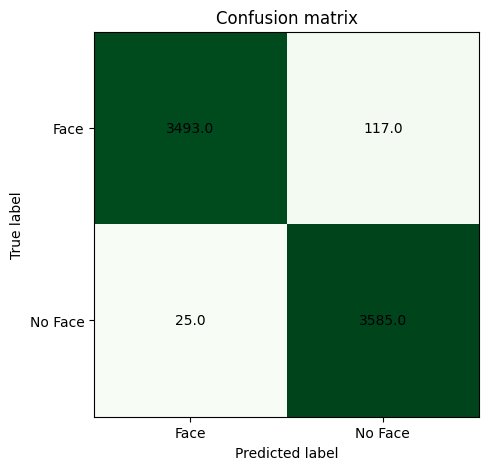

In [16]:
if __name__ == '__main__':
    main()